In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

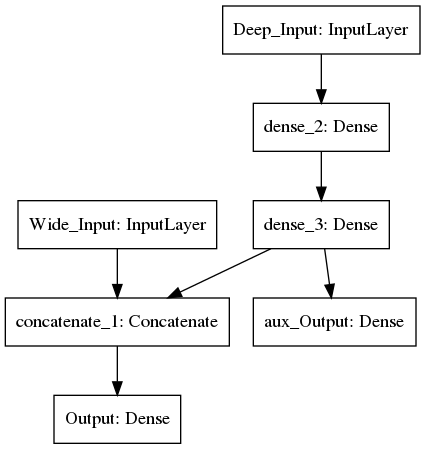

In [3]:
input_a = Input(shape=[1], name="Wide_Input")
input_b = Input(shape=[1], name="Deep_Input")


hidden_1 = Dense(30, activation="relu")(input_b)
hidden_2 = Dense(30, activation="relu")(hidden_1)


concat = concatenate([input_a, hidden_2])
output = Dense(1, name="Output")(concat)

# define another output
aux_output = Dense(1,name="aux_Output")(hidden_2)


model = Model(inputs=[input_a, input_b], outputs=[output, aux_output])

plot_model(model)

In [4]:
class WideAndDeepModel(Model):
    def __init__(self, units=32, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation = activation)
        self.hidden2 = Dense(units, activation = activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
        
    def call(self, inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        
        concat = concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [5]:
model = WideAndDeepModel()